# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Friday October 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.
```
pip install --upgrade pip
pip install tensorflow
```
**Acknowledgment** : Chris Ketelsen

Name: Anirudh Rathore

identikey: anra4396

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[25 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

**Part 1 [15 points]:** Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

YOUR ANSWER HERE

 * NOT $x_1$
\begin{array} {|r|r|}\hline x_1 & output \\ \hline 0 & 1 \\ \hline 1 & 0 \\ \hline  \end{array}

This can be achieved by a single layer perceptron. Following are the weight, bias and the indicator activation function.


\begin{array} {|r|r|}\hline w_1 & bias \\ \hline -1 & 1/2 \\ \hline  \end{array}

The indicator activation function is 

\begin{align*}
     w_1x_1 + b = \begin{cases}
            0    & -x_1 + 1/2 < 0  \\
            1  & -x_1 + 1/2 \geq 0
            \end{cases}
  \end{align*}


* $x_1$ NAND $x_2$
\begin{array} {|r|r|}\hline x_1 & x_2 & output \\ \hline 0 & 0 & 1 \\ \hline 0 & 1 & 1 \\ \hline 1 & 0 & 1 \\ \hline 1 & 1 & 0 \\ \hline  \end{array}


This can be achieved by a single layer perceptron. Following are the weight, bias and the indicator activation function.


\begin{array} {|r|r|}\hline w_1 & w_2 & bias \\ \hline -1 & -1 & 1 \\ \hline  \end{array}


The indicator activation function is 

\begin{align*}
     w_1x_1 + w_2x_2 + b = \begin{cases}
            0    & -x_1 - x_2 + 1 < 0  \\
            1  & -x_1 - x_2 + 1 \geq 0
            \end{cases}
  \end{align*}




* $x_1$ XNOR $x_2$
\begin{array} {|r|r|}\hline x_1 & x_2 & output \\ \hline 0 & 0 & 1 \\ \hline 0 & 1 & 0 \\ \hline 1 & 0 & 0 \\ \hline 1 & 1 & 1 \\ \hline  \end{array}


Cannot be achieved by single layer perceptron as the data is not linearly separable as the single layer perceptron is just a linear classifier and can only learn things that are linearly separable.

**Part 2 [10 points]:** Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

YOUR ANSWER HERE


* $x_1$ XNOR $x_2$
\begin{array} {|r|r|}\hline x_1 & x_2 & output \\ \hline 0 & 0 & 1 \\ \hline 0 & 1 & 0 \\ \hline 1 & 0 & 0 \\ \hline 1 & 1 & 1 \\ \hline  \end{array}



This problem can be solved by a multilayer perceptron by combining 3 perceptrons like this OR (AND ($x_1, x_2$), NOR ($x_1, x_2$)) where the output of the AND and NOR perceptrons generate the hidden layer which is fed into the final layer of OR perceptron. A 2 layered perecptron with the the weight matrix at the first layer as 

$\begin{align*}
   W^1=
  \left[ {\begin{array}{cc}
   1 & 1 \\
   -1 & -1 \\
  \end{array} } \right]
\end{align*}$


the bias matrix would be 

$\begin{align*}
   b^1=
  \left[ {\begin{array}{cc}
   -1.5 \\
   0.5 \\
  \end{array} } \right]
\end{align*}$


For the layer 2, the weight matrix would be

$\begin{align*}
   W^2=
  \left[ {\begin{array}{cc}
   1 & 1 \\
  \end{array} } \right]
\end{align*}$


and the bias matrix would be 

$\begin{align*}
   b^2=
  \left[ {\begin{array}{cc}
   -1 \\
  \end{array} } \right]
\end{align*}$

In [3]:
# YOUR CODE HERE
# BEGIN CODE HERE

# weight matrix at layer 1
w1_xnor = np.array([[1, 1], [-1, -1]])

# bias matrix at layer 1
b1_xnor = np.array([-1.5, 0.5])

# weight matrix at layer 2
w2_xnor = np.array([1, 1])

# bias matrix at layer 2
b2_xnor = np.array([-1])

# input values
x_xnor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# forward propogation
def xnor_forward_prop(x, w, b):
    a_list = []
    z_list = []
    
    z_i = np.dot(w, x.T) + b.T
    a_i = []
    for z_val in z_i:
        if z_val < 0:
            a_val = 0 
        else:
            a_val = 1
        a_i.append(a_val)
    z_list.append(z_i)
    
    
    return a_i


for x_i_xnor in x_xnor:
    # result after the first layer
    a1_xnor = np.array(xnor_forward_prop(x_i_xnor, w1_xnor, b1_xnor))
    print("result at layer 1 -- hidden")
    print(a1_xnor)

    # result after the second or the final layer
    print("result at final layer --")
    print(xnor_forward_prop(a1_xnor, w2_xnor, b2_xnor))
        
# END CODE HERE

result at layer 1 -- hidden
[0 1]
result at final layer --
[1]
result at layer 1 -- hidden
[0 0]
result at final layer --
[0]
result at layer 1 -- hidden
[0 0]
result at final layer --
[0]
result at layer 1 -- hidden
[1 0]
result at final layer --
[1]


[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part 1 [5 points]:** Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

YOUR ANSWER HERE


### At the first layer : 

$a^1 = x$

$z^1 = w^1a^1$ + $b^1$ = 1.0*0.5 + (-0.5) = 0.5 - 0.5 = 0

$a^2$ = $\sigma(z^1)$ = $\sigma$(0) = $\frac{1}{1+exp(-0)}$ = $\frac{1}{2}$ = 0.5

### At the second layer :

$z^2 = w^2a^2$ + $b^2$ = 1.0*0.5 + (-0.5) = 0.5 - 0.5 = 0

$a^3$ = $\sigma(z^2)$ = $\sigma$(0) = $\frac{1}{1+exp(-0)}$ = $\frac{1}{2}$ = 0.5

### At the third layer:

$z^3 = w^3a^3$ + $b^3$ = 1.0*0.5 + (-0.5) = 0.5 - 0.5 = 0

$a^4$ = $\sigma(z^3)$ = $\sigma$(0) = $\frac{1}{1+exp(-0)}$ = $\frac{1}{2}$ = 0.5


**Part 2 [5 points]:** Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

YOUR ANSWER HERE


### Layer 3

$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2
$

$\partial \ell / \partial a^4$ = $a^4 - y$ = 0.5 - 0 = $\frac{1}{2}$

$g\prime(z^3)$ = $g\prime(\sigma(z^3))$ = $\sigma(z^3) * (1 - \sigma(z^3))$ = $\frac{1}{2}$*$\frac{1}{2}$ = $\frac{1}{4}$

$\delta^3 = \partial \ell / \partial a^4 \odot g\prime(z^3)$  = $\frac{1}{2}$ * $\frac{1}{4}$ = $\frac{1}{8}$

$\partial \ell / \partial W^3$ = $\delta^3 * (a^3)$ = $\frac{1}{8}$*$\frac{1}{2}$ = $\frac{1}{16}$

$\partial \ell / \partial b^3$ = $\delta^3$ = $\frac{1}{8}$


### Layer 2

$g\prime(z^2)$ = $g\prime(\sigma(z^2))$ = $\sigma(z^2) * (1 - \sigma(z^2))$ = $\frac{1}{2}$*$\frac{1}{2}$ = $\frac{1}{4}$

$\delta^2 = (W^3) \delta^3 \odot g\prime(z^{2})$ = $\frac{1}{8}$*$\frac{1}{4}$ = $\frac{1}{32}$

$\partial \ell / \partial b^2$ = $\delta^2$ = $\frac{1}{32}$

$\partial \ell / \partial W^2$ = $\delta^2(a^2)$ = $\frac{1}{32}$ * $\frac{1}{2}$ = $\frac{1}{64}$


### Layer 1

$g\prime(z^1)$ = $g\prime(\sigma(z^1))$ = $\sigma(z^1) * (1 - \sigma(z^1))$ = $\frac{1}{2}$*$\frac{1}{2}$ = $\frac{1}{4}$

$\delta^1 = (W^2) \delta^2 \odot g\prime(z^{1})$ = $\frac{1}{32}$*$\frac{1}{4}$ = $\frac{1}{128}$

$\partial \ell / \partial b^1$ = $\delta^1$ = $\frac{1}{128}$

$\partial \ell / \partial W^1$ = $\delta^1(a^1)$ = $\frac{1}{128}$ * $\frac{1}{2}$ = $\frac{1}{256}$

**Part 3 [5 points]:** Implement the following activation functions:
* ReLU
* Sigmoid
* softmax

In [4]:
def relu(x):
    # YOUR CODE HERE
    # BEGIN CODE HERE
    if x<0:
        return 0
    else:
        return x
    # END CODE HERE

def sigmoid(x):
    # YOUR CODE HERE
    # BEGIN CODE HERE
    return 1/(1+math.exp(-x))
    # END CODE HERE

def softmax(x):
    # YOUR CODE HERE
    denominator = 0
    for element in x:
        denominator += math.exp(element)
    result = []
    for element in x:
        result.append(math.exp(element)/denominator)
    return result

In [5]:
# for grading - ignore
assert relu(5) == 5
assert relu(-5) == 0
assert relu(0) == 0
assert sigmoid(0.458) == 0.61253961344091512
assert sigmoid(2) == 0.8807970779778823
res = softmax([1,2,4])
temp = [0.04201007, 0.1141952 , 0.84379473]
for i in range(len(temp)):
    assert res[i] - temp[i] < 1e-5

**Part 4 [5 points]:** Implement the following Loss functions:
* mean squared error
* mean absolute error
* hinge

In [6]:
def mean_squared_error(yhat, y):
    # YOUR CODE HERE
    # BEGIN CODE HERE
    return np.square(yhat - y).mean(axis=0)
    # END CODE HERE
    
def mean_absolute_error(yhat, y):
    # YOUR CODE HERE
    # BEGIN CODE HERE
    return np.abs(yhat - y).mean(axis=0)
    # END CODE HERE

def hinge(yhat, y):
    # YOUR CODE HERE
    # BEGIN CODE HERE
    error = []
    for i in range(0, len(y)):
        error.append(max(0, 1 - yhat[i]*y[i]))
    return np.mean(np.array(error))
    # END CODE HERE

In [7]:
# for grading - ignore
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
assert mean_squared_error(y_pred,y_true) == 0.375
assert mean_absolute_error(y_pred,y_true) == 0.5
assert hinge(y_pred,y_true) == 0.25

**Part 5 [5 points]:** Explain the vanishing gradient problem. When would you observe this? Give an example.

YOUR ANSWER HERE


### Vanishing Gradient

* When more layers using activation functions like the sigmoid function are added to the neural network, the gradient of the loss funcction approcahes zero , making the network hard to train. This is the vanishing gradient problem.


* Activation functions like the sigmoid function which squish a large input space into a small input space between 0 and 1. For them, a large change in input causes a small change in output. Hence, the derivative becomes really small. As we saw in the example in Problem 2 Part 2, the gradient became really small even for 3 layers as it is a multiplicative factor of fractions.


* We would observe this when our activation functions are sigmoid functions. Again the example would be Problem Part 2 where we see in the back propogation the gradient is becoming really small. If we increase, the number of layers, it is gonna become really small.



* For sigmoid function, a larger value or a very small value is squished in between to 1 and 0 but the gradient for larger values is basically zero.

[25 Points] Problem 3 - Build a feedforward neural network
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests.

In [17]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.keep_prob = keep_prob
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        # YOUR CODE HERE

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            a = self.g(z)
        return a
        

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                xk = train[perm[kk]][0]
                yk = train[perm[kk]][1]
                # TODO: get gradients with xk, yk and do SGD on weights and biases
                # YOUR CODE HERE
                # BEGIN CODE
                (dW_list, db_list) = self.back_prop(xk, yk)
                
                for ll in range(self.L - 1):
                    self.weights[ll] -= eta*lam*self.weights[ll] + eta * dW_list[ll]
                    self.biases[ll] -= eta * (db_list[ll])
                
                # END CODE
            if verbose:
                if epoch == 0 or (epoch + 1) % 20 == 0:
                    acc_train = self.evaluate(train)
                    self.acc_train_array.append(acc_train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        self.acc_test_array.append(acc_test)
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta

        # YOUR CODE HERE
        # BEGIN CODE HERE
        L = self.L
        
        delta = z_list.copy()
        delta[L-1] = self.grad_cost(a_list[L - 1], y) * self.g_prime(z_list[L - 1])
        
        for ell in range(L - 1, 0, -1):
            db_list[ell - 1] = delta[ell]
            dW_list[ell - 1] = np.dot(delta[ell], a_list[ell - 1].T)
            delta[ell - 1] = np.dot(self.weights[ell - 1].T, delta[ell]) * self.g_prime(z_list[ell - 1])
        # END CODE HERE
        return (dW_list, db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        # YOUR CODE HERE
        
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            dropout_list = [0, 1]
            
            dropout_prob = [(1 - self.keep_prob), self.keep_prob]
            
            dropout_layer = np.random.choice(dropout_list, z.shape[0], p=dropout_prob)
            
            
            for i in range(z.shape[0]):
                if dropout_layer[i] == 0:
                    z[i] = b[i]
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)
        
        L = self.L
        
        delta = z_list.copy()
        delta[L-1] = self.grad_cost(a_list[L - 1], y) * self.g_prime(z_list[L - 1])
        
        for ell in range(L - 1, 0, -1):
            db_list[ell - 1] = delta[ell]
            dW_list[ell - 1] = np.dot(delta[ell], a_list[ell - 1].T)
            delta[ell - 1] = np.dot(self.weights[ell - 1].T, delta[ell]) * self.g_prime(z_list[ell - 1])
        
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

**Part 1 [15 points]:** Implement `SGD_train`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [11]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.303s

OK


**Part 2 [10 points]:**

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [12]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.15726, Test    0.16567
Epoch   20: Train    0.81753, Test    0.73349
Epoch   40: Train    0.87635, Test    0.79392
Epoch   60: Train    0.88756, Test    0.79832
Epoch   80: Train    0.88956, Test    0.80152
Epoch  100: Train    0.89116, Test    0.79952
Epoch  120: Train    0.89836, Test    0.80072
Epoch  140: Train    0.89476, Test    0.79472
Epoch  160: Train    0.89156, Test    0.80112
Epoch  180: Train    0.89636, Test    0.79752
Epoch  200: Train    0.90036, Test    0.79952

Hidden Layer Dimensions:  10
Epoch    1: Train    0.26371, Test    0.26371
Epoch   20: Train    0.90996, Test    0.83954
Epoch   40: Train    0.93637, Test    0.85914
Epoch   60: Train    0.94078, Test    0.86435
Epoch   80: Train    0.94638, Test    0.86234
Epoch  100: Train    0.94478, Test    0.86234
Epoch  120: Train    0.94838, Test    0.86154
Epoch  140: Train    0.94838, Test    0.86795
Epoch 

Plot training results below.

Text(0, 0.5, 'train accuracy')

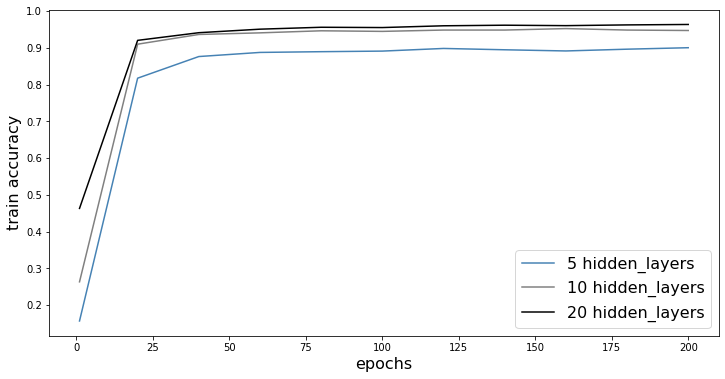

In [13]:
# YOUR CODE HERE
epochs_array = [i for i in range(0,200,20)]
epochs_array.append(200)
del epochs_array[0]
epochs_array.insert(0, 1)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs_array, nns[0].acc_train_array, color="steelblue", label=str(5)+" hidden_layers")
ax.plot(epochs_array, nns[1].acc_train_array, color="grey", label=str(10)+" hidden_layers")
ax.plot(epochs_array, nns[2].acc_train_array, color="black", label=str(20)+" hidden_layers")
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)

Plot testing results below.

Text(0, 0.5, 'test accuracy')

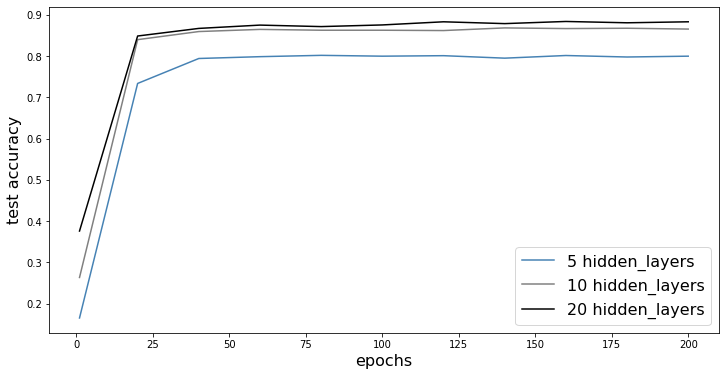

In [14]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs_array, nns[0].acc_test_array, color="steelblue", label=str(5)+" hidden_layers")
ax.plot(epochs_array, nns[1].acc_test_array, color="grey", label=str(10)+" hidden_layers")
ax.plot(epochs_array, nns[2].acc_test_array, color="black", label=str(20)+" hidden_layers")
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)

Give your explanation below.

YOUR ANSWER HERE

* As we increase the number of hidden layers, the model complexity increases and it is able to learn the train data as it is.

* But as we see, this helps little in genralizing as the test accuracy improves marginally but the model clearly overfits on the training data.

* This doesn't hurt the test accuracy in this case but it can actually hurt the models ability to generalize.

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [16]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.7)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)

Epoch    1: Train    0.10004, Test    0.10004
Epoch   20: Train    0.21729, Test    0.21969
Epoch   40: Train    0.72309, Test    0.68267
Epoch   60: Train    0.73589, Test    0.68227
Epoch   80: Train    0.71108, Test    0.65226
Epoch  100: Train    0.68427, Test    0.63145
Epoch  120: Train    0.65866, Test    0.60824
Epoch  140: Train    0.63265, Test    0.59104
Epoch  160: Train    0.60144, Test    0.57343
Epoch  180: Train    0.59344, Test    0.56663
Epoch  200: Train    0.57023, Test    0.54902
Epoch  220: Train    0.55022, Test    0.52301
Epoch  240: Train    0.55742, Test    0.53021
Epoch  260: Train    0.54262, Test    0.51421
Epoch  280: Train    0.53982, Test    0.51261
Epoch  300: Train    0.54782, Test    0.50740
Epoch  320: Train    0.53101, Test    0.47819
Epoch  340: Train    0.53862, Test    0.49860
Epoch  360: Train    0.53982, Test    0.49860
Epoch  380: Train    0.53421, Test    0.49420
Epoch  400: Train    0.52981, Test    0.49300


YOUR ANSWER HERE

Adding dropout helps in reducing the complexity of the model. Essentially, it helps avoid overfitting and the model is able to generalize on the test data.

[25 Points] Problem 4 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [Keras](https://keras.io/) to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for CPU-only of [TensorFlow](https://www.tensorflow.org/install) (version: 2.0.0) as the backend for Keras. We will use [`tf.keras`](https://www.tensorflow.org/api_docs/python/tf/keras) as our Keras API.

Update the snippet below to build a Sequential model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Part 1 [15 points]:** Complete the following functions `init`, `train`, and `evaluate` functions and report the accuracy

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer


class RNN:
    '''
    RNN classifier
    '''

    def __init__(self, train_x, train_y, test_x, test_y, dict_size=5000,
                 example_length=150, embedding_length=32, epoches=5, batch_size=128):
        '''
        initialize RNN model
        :param train_x: training data
        :param train_y: training label
        :param test_x: test data
        :param test_y: test label
        :param epoches: number of ephoches to run
        :param batch_size: batch size in training
        :param embedding_length: size of word embedding
        :param example_length: length of examples
        '''
        self.batch_size = batch_size
        self.epoches = epoches
        self.example_len = example_length
        self.dict_size = dict_size
        self.embedding_len = embedding_length

        # preprocess training data
        tok = Tokenizer(num_words=dict_size)
        tok.fit_on_texts(train_x)
        sequences = tok.texts_to_sequences(train_x)
        self.train_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)
        sequences = tok.texts_to_sequences(test_x)
        self.test_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)

        self.train_y = train_y
        self.test_y = test_y

        # TODO: build model with Embedding, LSTM and dense layers.
        # Please refer to Sequence classification with LSTM : 
        #     https://keras.io/getting-started/sequential-model-guide/#examples
        # Documentation for LSTM layer in : 
        #     https://keras.io/layers/recurrent/#lstm
        self.model = Sequential()
        # YOUR CODE HERE
        # BEGIN CODE HERE
        max_features = self.dict_size
        self.model.add(Embedding(max_features, output_dim=self.embedding_len))
        self.model.add(LSTM(self.embedding_len))
#         self.model.add(Dropout(0.5))
        self.model.add(Dense(1, activation='sigmoid'))

        # END CODE HERE
        self.model.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    def train(self, verbose=0):
        '''
        fit in data and train model
        please refer to the fit method in https://keras.io/models/model/#fit
        make sure you use batchsize and epochs appropriately.
        :return: None
        '''
        # TODO: fit in data to train your model
        # YOUR CODE HERE
        # BEGIN CODE HERE
        self.model.fit(self.train_x, self.train_y, batch_size=self.batch_size, epochs=self.epoches, verbose=verbose,
                      use_multiprocessing=True)
        # END CODE HERE

    def evaluate(self):
        '''
        evaluate trained model
        please refer to the evaluate method in https://keras.io/models/model/#evaluate
        :return: [loss, accuracy]
        '''
        # YOUR CODE HERE
        # BEGIN CODE HERE
        return self.model.evaluate(self.test_x, self.test_y, batch_size=16)
        # END CODE HERE

In [19]:
import pickle
def load_data(location):
    return pickle.load(open(location,'rb'))

In [20]:
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
rnn = RNN(train_x, train_y, test_x, test_y, epoches=5)
rnn.train(verbose=1)

loss, accuracy = rnn.evaluate()

print('Accuracy for LSTM: ', accuracy)

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 4s 889us/sample - loss: 0.4881 - accuracy: 0.8613
Epoch 2/5
4736/4736 [==============================] - 2s 451us/sample - loss: 0.1985 - accuracy: 0.9158
Epoch 3/5
4736/4736 [==============================] - 2s 454us/sample - loss: 0.0900 - accuracy: 0.9812
Epoch 4/5
4736/4736 [==============================] - 2s 457us/sample - loss: 0.0551 - accuracy: 0.9890
Epoch 5/5
4736/4736 [==============================] - 2s 466us/sample - loss: 0.0344 - accuracy: 0.9937
836/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.99401915


YOUR ANSWER HERE

Accuracy for LSTM:  99.401915 per cent

**Part 2 [10 points]:** 
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [21]:
RNNs = []
test_accuracy_array = []
for embedding_len in [8, 16, 32, 48, 64]:
    train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
    rnn = RNN(train_x, train_y, test_x, test_y, epoches=5, embedding_length=embedding_len)
    RNNs.append(rnn)
    rnn.train(verbose=1)
    loss, accuracy = rnn.evaluate()
    test_accuracy_array.append(accuracy)
    print('Accuracy for LSTM: ', accuracy)

train_accuracy_matrix = np.array(list(map(lambda x: x.model.history.history["accuracy"], RNNs)))

Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 694us/sample - loss: 0.6545 - accuracy: 0.8511
Epoch 2/5
4736/4736 [==============================] - 2s 319us/sample - loss: 0.4551 - accuracy: 0.8651
Epoch 3/5
4736/4736 [==============================] - 2s 318us/sample - loss: 0.3083 - accuracy: 0.8668
Epoch 4/5
4736/4736 [==============================] - 2s 321us/sample - loss: 0.2058 - accuracy: 0.9238
Epoch 5/5
4736/4736 [==============================] - 2s 318us/sample - loss: 0.1529 - accuracy: 0.9668
836/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.97129184
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 3s 684us/sample - loss: 0.5479 - accuracy: 0.8606
Epoch 2/5
4736/4736 [==============================] - 2s 331us/sample - loss: 0.2903 - accuracy: 0.8752
Epoch 3/5
4736/4736 [==============================] - 2s 325us/sample - loss: 0.1377 - accuracy: 0.9662
Epoch 4/5
4736/4736 [==============================] - 2s 340us/sample - loss: 0.0925 - accuracy: 0.9840
Epoch 5/5
4736/4736 [==============================] - 2s 366us/sample - loss: 0.0710 - accuracy: 0.9880
836/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9904306
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 4s 822us/sample - loss: 0.4605 - accuracy: 0.8566
Epoch 2/5
4736/4736 [==============================] - 2s 474us/sample - loss: 0.1823 - accuracy: 0.9217
Epoch 3/5
4736/4736 [==============================] - 2s 502us/sample - loss: 0.0826 - accuracy: 0.9844
Epoch 4/5
4736/4736 [==============================] - 3s 550us/sample - loss: 0.0465 - accuracy: 0.9922
Epoch 5/5
4736/4736 [==============================] - 3s 534us/sample - loss: 0.0293 - accuracy: 0.9935
836/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.99282295
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.4487 - accuracy: 0.8547
Epoch 2/5
4736/4736 [==============================] - 3s 702us/sample - loss: 0.1743 - accuracy: 0.9335
Epoch 3/5
4736/4736 [==============================] - 3s 665us/sample - loss: 0.0740 - accuracy: 0.9840
Epoch 4/5
4736/4736 [==============================] - 3s 697us/sample - loss: 0.0393 - accuracy: 0.9924
Epoch 5/5
4736/4736 [==============================] - 3s 683us/sample - loss: 0.0251 - accuracy: 0.9947
836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9964115
Train on 4736 samples
Epoch 1/5
4736/4736 [==============================] - 7s 1ms/sample - loss: 0.3957 - accuracy: 0.8579
Epoch 2/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.1010 - accuracy: 0.9757
Epoch 3/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.0414 - accuracy: 0.9903
Epoch 4/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.0214 - accuracy: 0.9939
Epoch 5/5
4736/4736 [==============================] - 5s 1ms/sample - loss: 0.0142 - accuracy: 0.9964
836/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy for LSTM:  0.9952153


Plot training results below.

Text(0, 0.5, 'train accuracy')

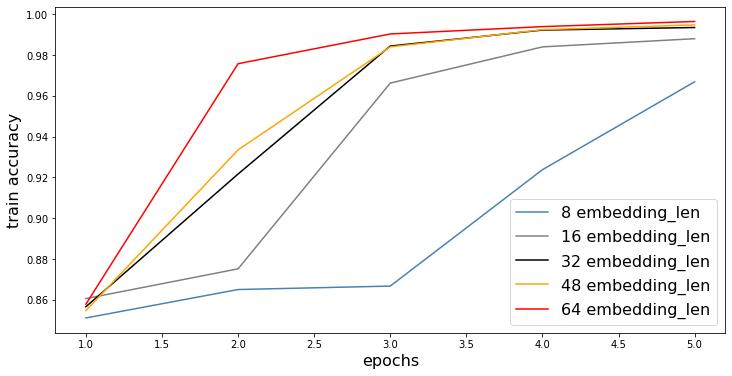

In [22]:
# YOUR CODE HERE
epochs_array = [1, 2, 3, 4, 5]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(epochs_array, train_accuracy_matrix[0], color="steelblue", label=str(8)+" embedding_len")
ax.plot(epochs_array, train_accuracy_matrix[1], color="grey", label=str(16)+" embedding_len")
ax.plot(epochs_array, train_accuracy_matrix[2], color="black", label=str(32)+" embedding_len")
ax.plot(epochs_array, train_accuracy_matrix[3], color="orange", label=str(48)+" embedding_len")
ax.plot(epochs_array, train_accuracy_matrix[4], color="red", label=str(64)+" embedding_len")
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)

In [23]:
for i in test_accuracy_array:
    print(i)

0.97129184
0.9904306
0.99282295
0.9964115
0.9952153


Give your observation and explanation below.

YOUR ANSWER HERE


Incrasing the embeddings increases the training accuracy. I think this is the case because as we increase the number of embeddings, it increases the number of features a value can map to. It captures a higher detail of the value and can learn all the features a value has entailed.


### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/6Kf72C26am1SAjtg6) to solicit your feedback for how to improve the course.